In [1]:
import pandas as pd
import numpy as np
import pickle

import matplotlib.pyplot as plt

from datetime import datetime

from sklearn import preprocessing
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.model_selection import learning_curve, GridSearchCV, train_test_split

In [2]:
#Set parameters to see all data
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 1000)

In [3]:
# Load Train dataset
train_60 = pd.read_csv("../data/201124_Cycles/data_60sec_no_overlap/trainData.csv", delimiter = ";")
train_120 = pd.read_csv("../data/201124_Cycles/data_120sec_no_overlap/trainData.csv", delimiter = ";")

In [4]:
train_60.head().append(train_60.tail())

,Cycle,meanVel,maxVel,minVel,stdVel,maxAccel,maxDecel,stdAccel,stdDecel,meanAccel,meanDecel,rAccel,rDecel,rStop,stopCnt,meanStopDur,meanGear,gearChg
0,1,0.746557,5.543296,0.000,1.498622,1.251712,-0.625856,0.407790,0.254198,0.764438,-0.342731,0.166667,0.050000,0.766667,1,46.0,1.000000,0
1,1,3.223903,10.237216,0.000,2.865706,2.503424,-2.056384,0.541438,0.610606,1.107081,-0.948944,0.283333,0.366667,0.200000,1,12.0,1.200000,3
2,1,5.926260,11.265408,0.000,3.520962,2.101088,-1.385824,0.511081,0.299588,0.553941,-0.445177,0.383333,0.400000,0.050000,1,3.0,1.583333,5
3,1,6.596820,11.801856,0.000,3.590125,2.682240,-2.637536,0.806090,0.616442,0.938784,-0.931076,0.366667,0.483333,0.033333,2,1.0,1.766667,9
4,1,3.960774,10.013696,0.000,3.855763,2.235200,-1.117600,0.671483,0.333223,0.750557,-0.455555,0.316667,0.350000,0.250000,2,7.5,1.366667,2
117,12,14.583935,23.263889,0.000,7.045107,2.777778,-2.602778,0.687488,0.710455,1.017816,-0.848077,0.483333,0.433333,0.083333,1,5.0,2.866667,7
118,12,10.135231,19.433333,0.000,6.525464,2.877778,-1.736111,0.687375,0.501192,0.889667,-0.826923,0.416667,0.433333,0.083333,1,5.0,2.150000,6
119,12,5.154074,12.700000,0.000,4.095980,2.408333,-2.711111,0.738142,0.838381,1.048148,-1.295139,0.400000,0.400000,0.083333,1,5.0,1.533333,7
120,12,17.044074,27.766667,2.325,7.529378,1.933333,-1.377778,0.515177,0.401838,0.919603,-0.666204,0.583333,0.300000,0.000000,0,0.0,3.266667,7
121,12,14.301481,25.516667,0.000,8.033258,2.491667,-1.961111,0.776762,0.578490,0.864259,-0.896953,0.250000,0.516667,0.083333,1,5.0,2.816667,6


In [5]:
train_60.shape

(122, 18)

In [6]:
train_60.dtypes

Cycle            int64
meanVel        float64
maxVel         float64
minVel         float64
stdVel         float64
maxAccel       float64
maxDecel       float64
stdAccel       float64
stdDecel       float64
meanAccel      float64
meanDecel      float64
rAccel         float64
rDecel         float64
rStop          float64
stopCnt          int64
meanStopDur    float64
meanGear       float64
gearChg          int64
dtype: object

In [7]:
train_60_with_overlap = pd.read_csv("../data/201127_Cycles/data_60sec_overlap_10parts/trainData.csv", delimiter = ";")
train_60_with_overlap.head().append(train_60_with_overlap.tail())

,Cycle,meanVel,maxVel,minVel,stdVel,maxAccel,maxDecel,stdAccel,stdDecel,meanAccel,meanDecel,rAccel,rDecel,rStop,stopCnt,meanStopDur,meanGear,gearChg
0,1,1.947761,10.237216,0.000000,2.656727,2.503424,-2.056384,0.533322,0.602727,0.979912,-0.907119,0.221239,0.212389,0.513274,2,29.000000,1.105263,4
1,1,4.160609,11.265408,0.000000,3.322402,2.503424,-2.056384,0.562980,0.546802,0.808736,-0.683644,0.389381,0.362832,0.132743,2,7.500000,1.298246,9
2,1,5.587216,11.801856,0.000000,3.546036,2.682240,-1.654048,0.705970,0.411211,0.800311,-0.578358,0.362832,0.424779,0.035398,2,2.000000,1.552632,11
3,1,5.443300,11.801856,0.000000,4.068559,2.682240,-2.637536,0.721179,0.573390,0.770805,-0.720628,0.292035,0.442478,0.141593,3,5.333333,1.605263,11
4,1,4.562161,11.801856,0.000000,3.883047,2.235200,-2.637536,0.569402,0.557629,0.670560,-0.704088,0.309735,0.424779,0.221239,3,8.333333,1.447368,8
115,12,33.000904,37.347222,27.066667,3.011854,0.900000,-0.844444,0.244126,0.216356,0.417256,-0.354293,0.402439,0.268293,0.000000,0,0.000000,5.000000,0
116,12,33.661312,37.347222,29.594444,2.039236,0.900000,-0.844444,0.228588,0.228170,0.374552,-0.397024,0.378049,0.341463,0.000000,0,0.000000,5.000000,0
117,12,33.089592,37.347222,29.594444,2.094148,0.730556,-0.844444,0.158231,0.233338,0.320833,-0.398765,0.365854,0.329268,0.000000,0,0.000000,5.000000,0
118,12,32.652075,36.419444,29.161111,1.859121,0.711111,-0.936111,0.162939,0.253823,0.350992,-0.452533,0.341463,0.414634,0.000000,0,0.000000,5.000000,0
119,12,27.841466,36.419444,1.594444,8.997612,0.711111,-1.750000,0.169022,0.506176,0.364141,-0.888307,0.268293,0.524390,0.000000,0,0.000000,4.493976,4


In [51]:
train_60_with_overlap.Cycle.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [8]:
train_60_with_overlap.shape

(120, 18)

In [9]:
train_60_with_overlap.dtypes

Cycle            int64
meanVel        float64
maxVel         float64
minVel         float64
stdVel         float64
maxAccel       float64
maxDecel       float64
stdAccel       float64
stdDecel       float64
meanAccel      float64
meanDecel      float64
rAccel         float64
rDecel         float64
rStop          float64
stopCnt          int64
meanStopDur    float64
meanGear       float64
gearChg          int64
dtype: object

In [10]:
train_60_with_overlap.meanVel.min(), train_60_with_overlap.meanVel.max()

(1.023989899, 35.10576259)

In [11]:
corr = train_60_with_overlap.corr()
corr

,Cycle,meanVel,maxVel,minVel,stdVel,maxAccel,maxDecel,stdAccel,stdDecel,meanAccel,meanDecel,rAccel,rDecel,rStop,stopCnt,meanStopDur,meanGear,gearChg
Cycle,1.000000,0.453557,0.553852,0.276102,0.324681,0.004840,0.057181,0.005050,0.053892,0.065991,-0.120517,0.229793,0.091674,-0.357404,-0.153286,-0.339659,0.460594,-0.049607
meanVel,0.453557,1.000000,0.944591,0.854643,-0.116302,-0.615467,0.414031,-0.646254,-0.535324,-0.641774,0.608507,0.059810,-0.141814,-0.675415,-0.662247,-0.567999,0.992730,-0.561112
maxVel,0.553852,0.944591,1.000000,0.703070,0.173534,-0.436851,0.238858,-0.474437,-0.340697,-0.460699,0.422863,0.204808,-0.043574,-0.655819,-0.606324,-0.540789,0.938883,-0.378102
minVel,0.276102,0.854643,0.703070,1.000000,-0.546758,-0.680567,0.564134,-0.706356,-0.679888,-0.662413,0.690027,-0.117619,-0.321006,-0.462747,-0.531664,-0.408972,0.834931,-0.686814
stdVel,0.324681,-0.116302,0.173534,-0.546758,1.000000,0.490775,-0.503230,0.504003,0.570777,0.450220,-0.515302,0.364627,0.395549,-0.065563,0.085395,0.000809,-0.101139,0.532810
maxAccel,0.004840,-0.615467,-0.436851,-0.680567,0.490775,1.000000,-0.669968,0.957156,0.753860,0.871877,-0.751034,0.243132,0.383808,0.330169,0.620908,0.197029,-0.614401,0.676575
maxDecel,0.057181,0.414031,0.238858,0.564134,-0.503230,-0.669968,1.000000,-0.655980,-0.914576,-0.634542,0.715069,-0.261122,-0.499178,-0.177223,-0.407959,-0.085632,0.411559,-0.714307
stdAccel,0.005050,-0.646254,-0.474437,-0.706356,0.504003,0.957156,-0.655980,1.000000,0.764532,0.924623,-0.790957,0.166495,0.424644,0.365292,0.594382,0.233804,-0.643834,0.682017
stdDecel,0.053892,-0.535324,-0.340697,-0.679888,0.570777,0.753860,-0.914576,0.764532,1.000000,0.762692,-0.888009,0.280705,0.479960,0.276591,0.435576,0.180428,-0.533701,0.721156
meanAccel,0.065991,-0.641774,-0.460699,-0.662413,0.450220,0.871877,-0.634542,0.924623,0.762692,1.000000,-0.861825,0.176907,0.429084,0.369563,0.540525,0.240558,-0.641965,0.709723


In [12]:
cr = corr.copy()
top_corr_columns = []
#Determine best correlate columns over 0.1
top_corr_columns = cr.loc[:, 'Cycle'][:-1]
best_accurate_columns = top_corr_columns[abs(top_corr_columns) > 0.1].sort_values(ascending=False)
best_accurate_columns

Cycle          1.000000
maxVel         0.553852
meanGear       0.460594
meanVel        0.453557
stdVel         0.324681
minVel         0.276102
rAccel         0.229793
meanDecel     -0.120517
stopCnt       -0.153286
meanStopDur   -0.339659
rStop         -0.357404
Name: Cycle, dtype: float64

In [13]:
bins_methods = [ "auto", "fd", "doane", "scott", "stone", "rice", "sturges", "sqrt"]

In [14]:
# https://stackoverflow.com/a/18364570
def get_columns_bins(column_name):
    all_bins = []

    for method in bins_methods:
        start = datetime.now()
        hist, bin_edges = np.histogram(column_name,bins=method)
        all_bins.append(bin_edges)
        print("Method : {:<7} - Running Time : {:<5} - Number of bins : {:<5} - Head : {} - Tail : {}".format(method,str(datetime.now()-start), len(bin_edges), bin_edges[:3], bin_edges[-3:-1]))
    return all_bins

In [15]:
# https://stackoverflow.com/a/18364570
def get_clustering_bins(s, quantile=0.3, n_samples=None):
    
    series = s.dropna().values.reshape(-1, 1)
    
    bandwidth = estimate_bandwidth(series, quantile=quantile, n_samples=n_samples)
    clustering = MeanShift(bandwidth=bandwidth, bin_seeding=True).fit(series)

    d = pd.DataFrame(columns=['data_column', 'label_column'])

    d['data_column'] = series.reshape(-1)
    d['label_column'] = clustering.labels_
    
    sorted_vals = d.groupby('label_column')['data_column'].max().sort_values().values
    bins = np.insert(sorted_vals, [0] , [series.min()-1])
    bins[-1] = bins[-1] + 1
    
    return bins, range(bins.size-1)

#Apply bins to age column

In [16]:
train_60_with_overlap.columns

Index(['Cycle', 'meanVel', 'maxVel', 'minVel', 'stdVel', 'maxAccel', 'maxDecel', 'stdAccel', 'stdDecel', 'meanAccel', 'meanDecel', 'rAccel', 'rDecel', 'rStop', 'stopCnt', 'meanStopDur', 'meanGear', 'gearChg'], dtype='object')

In [17]:
train_60_with_overlap.meanVel.min()

1.023989899

In [18]:
def determine_bins(df, col):
    all_bins_col = []
    all_bins_col = get_columns_bins(df[col])
    
    _bin,label = get_clustering_bins(pd.Series(all_bins_col[0]))
    df.hist(bins=_bin)
    _bin
    
    len(_bin) , df[col].value_counts(bins=_bin)
    
    str1 = col
    str2 = "_category"
    col_name = str1 + str2
    
    df[col_name] = pd.cut(df[col], _bin).cat.codes
    df.head(5).append(df.tail(5))
    return df

Method : auto    - Running Time : 0:00:00.000836 - Number of bins : 9     - Head : [1.    2.375 3.75 ] - Tail : [ 9.25  10.625]
Method : fd      - Running Time : 0:00:00.000763 - Number of bins : 6     - Head : [1.  3.2 5.4] - Tail : [7.6 9.8]
Method : doane   - Running Time : 0:00:00.000652 - Number of bins : 9     - Head : [1.    2.375 3.75 ] - Tail : [ 9.25  10.625]
Method : scott   - Running Time : 0:00:00.000368 - Number of bins : 6     - Head : [1.  3.2 5.4] - Tail : [7.6 9.8]
Method : stone   - Running Time : 0:00:00.022354 - Number of bins : 101   - Head : [1.   1.11 1.22] - Tail : [11.78 11.89]
Method : rice    - Running Time : 0:00:00.000345 - Number of bins : 11    - Head : [1.  2.1 3.2] - Tail : [ 9.8 10.9]
Method : sturges - Running Time : 0:00:00.000307 - Number of bins : 9     - Head : [1.    2.375 3.75 ] - Tail : [ 9.25  10.625]
Method : sqrt    - Running Time : 0:00:00.000350 - Number of bins : 12    - Head : [1. 2. 3.] - Tail : [10. 11.]


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/lib/histograms.py:795: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cluster/_mean_shift.py:235: UserWarning: Binning data failed with provided bin_size=1.375000, using data points as seeds.
  " using data points as seeds." % bin_size)


Method : auto    - Running Time : 0:00:00.000330 - Number of bins : 9     - Head : [1.0239899  5.28421149 9.54443307] - Tail : [26.58531942 30.845541  ]
Method : fd      - Running Time : 0:00:00.000558 - Number of bins : 7     - Head : [ 1.0239899   6.70428535 12.3845808 ] - Tail : [23.74517169 29.42546714]
Method : doane   - Running Time : 0:00:00.000316 - Number of bins : 11    - Head : [1.0239899  4.43216717 7.84034444] - Tail : [28.28940805 31.69758532]
Method : scott   - Running Time : 0:00:00.000284 - Number of bins : 6     - Head : [ 1.0239899   7.84034444 14.65669898] - Tail : [21.47305351 28.28940805]
Method : stone   - Running Time : 0:00:00.012502 - Number of bins : 5     - Head : [ 1.0239899   9.54443307 18.06487624] - Tail : [18.06487624 26.58531942]
Method : rice    - Running Time : 0:00:00.000316 - Number of bins : 11    - Head : [1.0239899  4.43216717 7.84034444] - Tail : [28.28940805 31.69758532]
Method : sturges - Running Time : 0:00:00.000213 - Number of bins : 9    

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cluster/_mean_shift.py:235: UserWarning: Binning data failed with provided bin_size=4.260222, using data points as seeds.
  " using data points as seeds." % bin_size)


Method : auto    - Running Time : 0:00:00.000383 - Number of bins : 9     - Head : [ 6.80555556 10.62326389 14.44097222] - Tail : [29.71180555 33.52951389]
Method : fd      - Running Time : 0:00:00.000370 - Number of bins : 6     - Head : [ 6.80555556 12.91388889 19.02222222] - Tail : [25.13055555 31.23888889]
Method : doane   - Running Time : 0:00:00.000322 - Number of bins : 10    - Head : [ 6.80555556 10.19907407 13.59259259] - Tail : [30.56018518 33.9537037 ]
Method : scott   - Running Time : 0:00:00.000278 - Number of bins : 6     - Head : [ 6.80555556 12.91388889 19.02222222] - Tail : [25.13055555 31.23888889]
Method : stone   - Running Time : 0:00:00.011260 - Number of bins : 96    - Head : [6.80555556 7.12704678 7.44853801] - Tail : [36.70423976 37.02573099]
Method : rice    - Running Time : 0:00:00.000212 - Number of bins : 11    - Head : [ 6.80555556  9.85972222 12.91388889] - Tail : [31.23888889 34.29305555]
Method : sturges - Running Time : 0:00:00.000193 - Number of bins :

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cluster/_mean_shift.py:235: UserWarning: Binning data failed with provided bin_size=3.817708, using data points as seeds.
  " using data points as seeds." % bin_size)


Method : auto    - Running Time : 0:00:00.000387 - Number of bins : 9     - Head : [0.         4.17013889 8.34027778] - Tail : [25.02083333 29.19097222]
Method : fd      - Running Time : 0:00:00.000326 - Number of bins : 8     - Head : [0.         4.76587302 9.53174603] - Tail : [23.82936508 28.59523809]
Method : doane   - Running Time : 0:00:00.000270 - Number of bins : 12    - Head : [0.         3.03282828 6.06565657] - Tail : [27.29545454 30.32828283]
Method : scott   - Running Time : 0:00:00.000335 - Number of bins : 6     - Head : [ 0.          6.67222222 13.34444444] - Tail : [20.01666667 26.68888889]
Method : stone   - Running Time : 0:00:00.011550 - Number of bins : 101   - Head : [0.         0.33361111 0.66722222] - Tail : [32.69388889 33.0275    ]
Method : rice    - Running Time : 0:00:00.000217 - Number of bins : 11    - Head : [0.         3.33611111 6.67222222] - Tail : [26.68888889 30.025     ]
Method : sturges - Running Time : 0:00:00.000200 - Number of bins : 9     - Hea

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/lib/histograms.py:795: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cluster/_mean_shift.py:235: UserWarning: Binning data failed with provided bin_size=4.170139, using data points as seeds.
  " using data points as seeds." % bin_size)


Method : auto    - Running Time : 0:00:00.000319 - Number of bins : 13    - Head : [0.43388626 1.35849893 2.28311159] - Tail : [ 9.68001293 10.60462559]
Method : fd      - Running Time : 0:00:00.000310 - Number of bins : 13    - Head : [0.43388626 1.35849893 2.28311159] - Tail : [ 9.68001293 10.60462559]
Method : doane   - Running Time : 0:00:00.000271 - Number of bins : 12    - Head : [0.43388626 1.44255462 2.45122299] - Tail : [ 9.51190153 10.5205699 ]
Method : scott   - Running Time : 0:00:00.000222 - Number of bins : 9     - Head : [0.43388626 1.82080526 3.20772426] - Tail : [ 8.75540026 10.14231926]
Method : stone   - Running Time : 0:00:00.010949 - Number of bins : 7     - Head : [0.43388626 2.28311159 4.13233693] - Tail : [7.83078759 9.68001293]
Method : rice    - Running Time : 0:00:00.000209 - Number of bins : 11    - Head : [0.43388626 1.54342146 2.65295666] - Tail : [ 9.31016786 10.41970306]
Method : sturges - Running Time : 0:00:00.000203 - Number of bins : 9     - Head : [

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cluster/_mean_shift.py:235: UserWarning: Binning data failed with provided bin_size=0.447040, using data points as seeds.
  " using data points as seeds." % bin_size)


Method : auto    - Running Time : 0:00:00.000428 - Number of bins : 9     - Head : [-4.08333333 -3.60069444 -3.11805556] - Tail : [-1.1875     -0.70486111]
Method : fd      - Running Time : 0:00:00.000370 - Number of bins : 9     - Head : [-4.08333333 -3.60069444 -3.11805556] - Tail : [-1.1875     -0.70486111]
Method : doane   - Running Time : 0:00:00.000333 - Number of bins : 10    - Head : [-4.08333333 -3.65432099 -3.22530864] - Tail : [-1.08024691 -0.65123457]
Method : scott   - Running Time : 0:00:00.000264 - Number of bins : 8     - Head : [-4.08333333 -3.53174603 -2.98015873] - Tail : [-1.32539683 -0.77380952]
Method : stone   - Running Time : 0:00:00.013708 - Number of bins : 100   - Head : [-4.08333333 -4.04433221 -4.00533109] - Tail : [-0.30022447 -0.26122334]
Method : rice    - Running Time : 0:00:00.000407 - Number of bins : 11    - Head : [-4.08333333 -3.69722222 -3.31111111] - Tail : [-0.99444444 -0.60833333]
Method : sturges - Running Time : 0:00:00.000282 - Number of bin

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cluster/_mean_shift.py:235: UserWarning: Binning data failed with provided bin_size=0.482639, using data points as seeds.
  " using data points as seeds." % bin_size)


Method : auto    - Running Time : 0:00:00.000479 - Number of bins : 9     - Head : [0.02580987 0.13887091 0.25193195] - Tail : [0.70417611 0.81723716]
Method : fd      - Running Time : 0:00:00.000508 - Number of bins : 8     - Head : [0.02580987 0.15502248 0.2842351 ] - Tail : [0.67187296 0.80108558]
Method : doane   - Running Time : 0:00:00.000404 - Number of bins : 10    - Head : [0.02580987 0.12630857 0.22680727] - Tail : [0.72930079 0.82979949]
Method : scott   - Running Time : 0:00:00.000351 - Number of bins : 8     - Head : [0.02580987 0.15502248 0.2842351 ] - Tail : [0.67187296 0.80108558]
Method : stone   - Running Time : 0:00:00.015731 - Number of bins : 6     - Head : [0.02580987 0.20670753 0.3876052 ] - Tail : [0.56850286 0.74940053]
Method : rice    - Running Time : 0:00:00.000318 - Number of bins : 11    - Head : [0.02580987 0.1162587  0.20670753] - Tail : [0.74940053 0.83984936]
Method : sturges - Running Time : 0:00:00.000301 - Number of bins : 9     - Head : [0.02580987

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cluster/_mean_shift.py:235: UserWarning: Binning data failed with provided bin_size=0.113061, using data points as seeds.
  " using data points as seeds." % bin_size)


Method : auto    - Running Time : 0:00:00.000462 - Number of bins : 9     - Head : [0.02313808 0.12484039 0.22654269] - Tail : [0.63335192 0.73505422]
Method : fd      - Running Time : 0:00:00.000435 - Number of bins : 7     - Head : [0.02313808 0.15874116 0.29434423] - Tail : [0.56555038 0.70115345]
Method : doane   - Running Time : 0:00:00.000334 - Number of bins : 10    - Head : [0.02313808 0.11354013 0.20394218] - Tail : [0.65595243 0.74635448]
Method : scott   - Running Time : 0:00:00.000288 - Number of bins : 7     - Head : [0.02313808 0.15874116 0.29434423] - Tail : [0.56555038 0.70115345]
Method : stone   - Running Time : 0:00:00.013009 - Number of bins : 15    - Head : [0.02313808 0.08125368 0.13936929] - Tail : [0.72052532 0.77864093]
Method : rice    - Running Time : 0:00:00.000330 - Number of bins : 11    - Head : [0.02313808 0.10449993 0.18586177] - Tail : [0.67403284 0.75539468]
Method : sturges - Running Time : 0:00:00.000280 - Number of bins : 9     - Head : [0.02313808

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cluster/_mean_shift.py:235: UserWarning: Binning data failed with provided bin_size=0.101702, using data points as seeds.
  " using data points as seeds." % bin_size)


Method : auto    - Running Time : 0:00:00.000429 - Number of bins : 11    - Head : [0.1372549  0.29742797 0.45760104] - Tail : [1.41863946 1.57881253]
Method : fd      - Running Time : 0:00:00.000362 - Number of bins : 11    - Head : [0.1372549  0.29742797 0.45760104] - Tail : [1.41863946 1.57881253]
Method : doane   - Running Time : 0:00:00.000507 - Number of bins : 11    - Head : [0.1372549  0.29742797 0.45760104] - Tail : [1.41863946 1.57881253]
Method : scott   - Running Time : 0:00:00.000295 - Number of bins : 9     - Head : [0.1372549  0.33747124 0.53768758] - Tail : [1.33855293 1.53876926]
Method : stone   - Running Time : 0:00:00.013660 - Number of bins : 9     - Head : [0.1372549  0.33747124 0.53768758] - Tail : [1.33855293 1.53876926]
Method : rice    - Running Time : 0:00:00.000277 - Number of bins : 11    - Head : [0.1372549  0.29742797 0.45760104] - Tail : [1.41863946 1.57881253]
Method : sturges - Running Time : 0:00:00.000249 - Number of bins : 9     - Head : [0.1372549 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/lib/histograms.py:795: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


Method : auto    - Running Time : 0:00:00.000349 - Number of bins : 10    - Head : [0.         0.77777778 1.55555556] - Tail : [5.44444444 6.22222222]
Method : fd      - Running Time : 0:00:00.000331 - Number of bins : 10    - Head : [0.         0.77777778 1.55555556] - Tail : [5.44444444 6.22222222]
Method : doane   - Running Time : 0:00:00.000317 - Number of bins : 13    - Head : [0.         0.58333333 1.16666667] - Tail : [5.83333333 6.41666667]
Method : scott   - Running Time : 0:00:00.000254 - Number of bins : 9     - Head : [0.    0.875 1.75 ] - Tail : [5.25  6.125]
Method : stone   - Running Time : 0:00:00.013895 - Number of bins : 101   - Head : [0.   0.07 0.14] - Tail : [6.86 6.93]
Method : rice    - Running Time : 0:00:00.000233 - Number of bins : 11    - Head : [0.  0.7 1.4] - Tail : [5.6 6.3]
Method : sturges - Running Time : 0:00:00.000244 - Number of bins : 9     - Head : [0.    0.875 1.75 ] - Tail : [5.25  6.125]
Method : sqrt    - Running Time : 0:00:00.000234 - Number 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/lib/histograms.py:795: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


Method : auto    - Running Time : 0:00:00.000366 - Number of bins : 23    - Head : [0.         3.04545455 6.09090909] - Tail : [60.90909091 63.95454545]
Method : fd      - Running Time : 0:00:00.000807 - Number of bins : 23    - Head : [0.         3.04545455 6.09090909] - Tail : [60.90909091 63.95454545]
Method : doane   - Running Time : 0:00:00.000343 - Number of bins : 13    - Head : [ 0.          5.58333333 11.16666667] - Tail : [55.83333333 61.41666667]
Method : scott   - Running Time : 0:00:00.000269 - Number of bins : 9     - Head : [ 0.     8.375 16.75 ] - Tail : [50.25  58.625]
Method : stone   - Running Time : 0:00:00.012618 - Number of bins : 101   - Head : [0.   0.67 1.34] - Tail : [65.66 66.33]
Method : rice    - Running Time : 0:00:00.000207 - Number of bins : 11    - Head : [ 0.   6.7 13.4] - Tail : [53.6 60.3]
Method : sturges - Running Time : 0:00:00.000204 - Number of bins : 9     - Head : [ 0.     8.375 16.75 ] - Tail : [50.25  58.625]
Method : sqrt    - Running Time 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/lib/histograms.py:795: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


Method : auto    - Running Time : 0:00:00.000316 - Number of bins : 9     - Head : [1.05844156 1.55113636 2.04383117] - Tail : [4.01461039 4.50730519]
Method : fd      - Running Time : 0:00:00.000291 - Number of bins : 6     - Head : [1.05844156 1.84675325 2.63506493] - Tail : [3.42337662 4.21168831]
Method : doane   - Running Time : 0:00:00.000266 - Number of bins : 11    - Head : [1.05844156 1.4525974  1.84675325] - Tail : [4.21168831 4.60584416]
Method : scott   - Running Time : 0:00:00.000215 - Number of bins : 6     - Head : [1.05844156 1.84675325 2.63506493] - Tail : [3.42337662 4.21168831]
Method : stone   - Running Time : 0:00:00.010636 - Number of bins : 61    - Head : [1.05844156 1.1241342  1.18982684] - Tail : [4.86861472 4.93430736]
Method : rice    - Running Time : 0:00:00.000212 - Number of bins : 11    - Head : [1.05844156 1.4525974  1.84675325] - Tail : [4.21168831 4.60584416]
Method : sturges - Running Time : 0:00:00.000200 - Number of bins : 9     - Head : [1.05844156

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cluster/_mean_shift.py:235: UserWarning: Binning data failed with provided bin_size=0.492695, using data points as seeds.
  " using data points as seeds." % bin_size)


Method : auto    - Running Time : 0:00:00.000329 - Number of bins : 11    - Head : [0.  2.4 4.8] - Tail : [19.2 21.6]
Method : fd      - Running Time : 0:00:00.000386 - Number of bins : 11    - Head : [0.  2.4 4.8] - Tail : [19.2 21.6]
Method : doane   - Running Time : 0:00:00.000294 - Number of bins : 11    - Head : [0.  2.4 4.8] - Tail : [19.2 21.6]
Method : scott   - Running Time : 0:00:00.000235 - Number of bins : 9     - Head : [0. 3. 6.] - Tail : [18. 21.]
Method : stone   - Running Time : 0:00:00.013174 - Number of bins : 101   - Head : [0.   0.24 0.48] - Tail : [23.52 23.76]
Method : rice    - Running Time : 0:00:00.000226 - Number of bins : 11    - Head : [0.  2.4 4.8] - Tail : [19.2 21.6]
Method : sturges - Running Time : 0:00:00.000307 - Number of bins : 9     - Head : [0. 3. 6.] - Tail : [18. 21.]
Method : sqrt    - Running Time : 0:00:00.000238 - Number of bins : 12    - Head : [0.         2.18181818 4.36363636] - Tail : [19.63636364 21.81818182]


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/lib/histograms.py:795: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


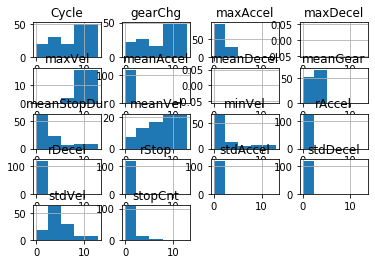

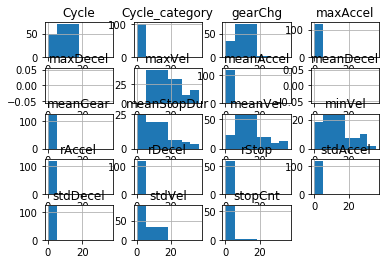

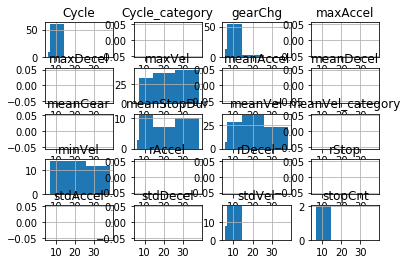

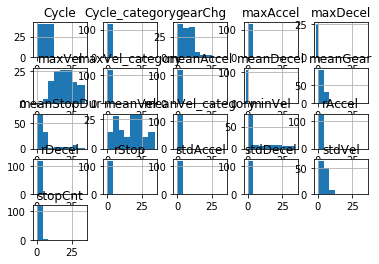

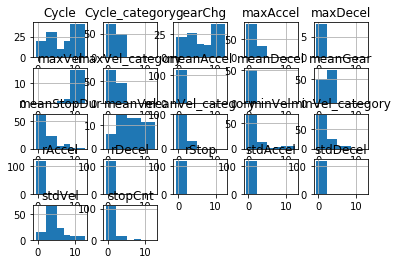

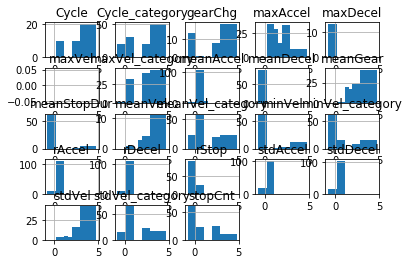

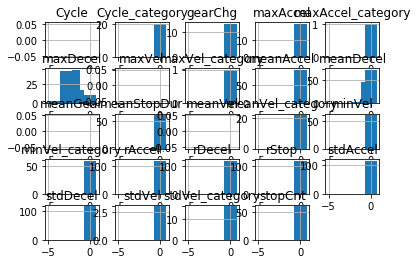

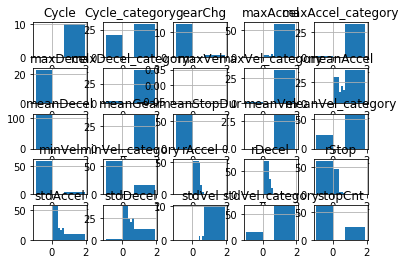

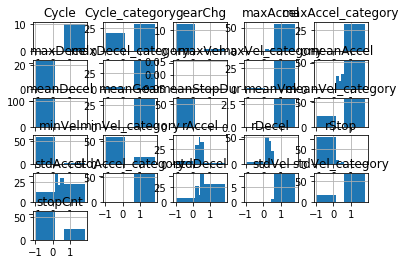

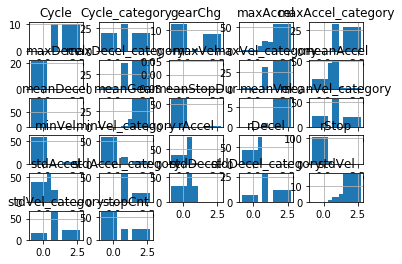

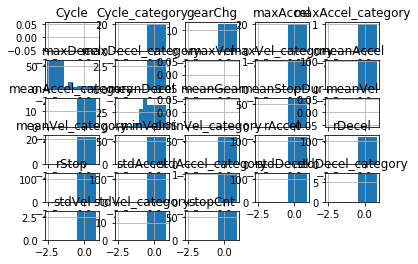

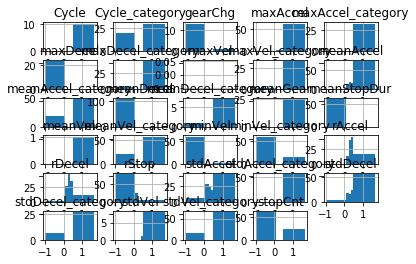

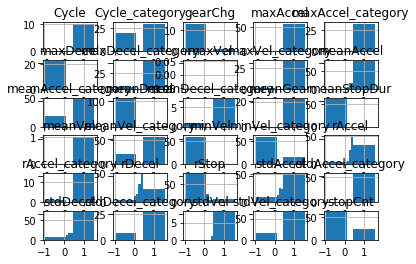

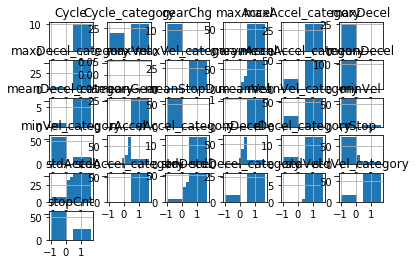

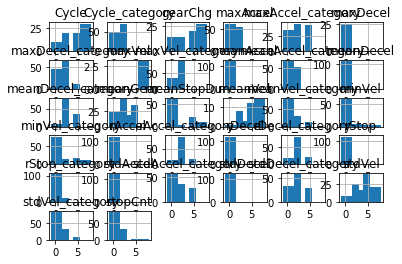

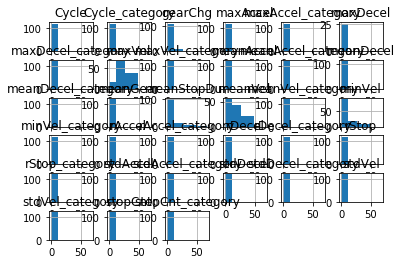

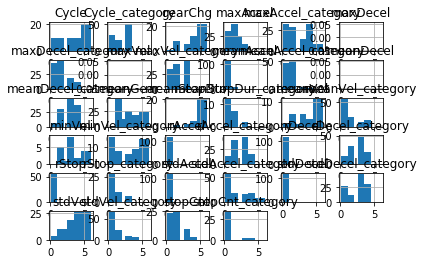

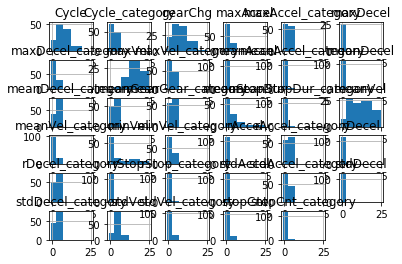

In [19]:
for cols in train_60_with_overlap.columns:
    train_60_with_overlap = determine_bins(train_60_with_overlap, cols)

In [20]:
train_60_with_overlap.head()

,Cycle,meanVel,maxVel,minVel,stdVel,maxAccel,maxDecel,stdAccel,stdDecel,meanAccel,meanDecel,rAccel,rDecel,rStop,stopCnt,meanStopDur,meanGear,gearChg,Cycle_category,meanVel_category,maxVel_category,minVel_category,stdVel_category,maxAccel_category,maxDecel_category,stdAccel_category,stdDecel_category,meanAccel_category,meanDecel_category,rAccel_category,rDecel_category,rStop_category,stopCnt_category,meanStopDur_category,meanGear_category,gearChg_category
0,1,1.947761,10.237216,0.0,2.656727,2.503424,-2.056384,0.533322,0.602727,0.979912,-0.907119,0.221239,0.212389,0.513274,2,29.000000,1.105263,4,0,0,1,0,1,4,2,3,3,2,2,1,1,3,1,2,1,1
1,1,4.160609,11.265408,0.0,3.322402,2.503424,-2.056384,0.562980,0.546802,0.808736,-0.683644,0.389381,0.362832,0.132743,2,7.500000,1.298246,9,0,0,1,0,1,4,2,3,3,2,3,3,3,1,1,0,1,2
2,1,5.587216,11.801856,0.0,3.546036,2.682240,-1.654048,0.705970,0.411211,0.800311,-0.578358,0.362832,0.424779,0.035398,2,2.000000,1.552632,11,0,1,1,0,1,4,2,5,2,2,3,2,3,0,1,0,1,2
3,1,5.443300,11.801856,0.0,4.068559,2.682240,-2.637536,0.721179,0.573390,0.770805,-0.720628,0.292035,0.442478,0.141593,3,5.333333,1.605263,11,0,1,1,0,1,4,1,5,3,2,3,2,4,1,1,0,1,2
4,1,4.562161,11.801856,0.0,3.883047,2.235200,-2.637536,0.569402,0.557629,0.670560,-0.704088,0.309735,0.424779,0.221239,3,8.333333,1.447368,8,0,0,1,0,1,4,1,3,3,2,3,2,3,1,1,0,1,2


In [21]:
corr2 = train_60_with_overlap.corr()
corr2

,Cycle,meanVel,maxVel,minVel,stdVel,maxAccel,maxDecel,stdAccel,stdDecel,meanAccel,meanDecel,rAccel,rDecel,rStop,stopCnt,meanStopDur,meanGear,gearChg,Cycle_category,meanVel_category,maxVel_category,minVel_category,stdVel_category,maxAccel_category,maxDecel_category,stdAccel_category,stdDecel_category,meanAccel_category,meanDecel_category,rAccel_category,rDecel_category,rStop_category,stopCnt_category,meanStopDur_category,meanGear_category,gearChg_category
Cycle,1.000000,0.453557,0.553852,0.276102,0.324681,0.004840,0.057181,0.005050,0.053892,0.065991,-0.120517,0.229793,0.091674,-0.357404,-0.153286,-0.339659,0.460594,-0.049607,0.950728,0.459908,0.531278,0.268815,0.275857,-0.006232,0.089493,0.100747,0.035094,0.068708,-0.095575,0.214521,0.085092,-0.355450,-0.103646,-0.364710,0.400698,-0.052057
meanVel,0.453557,1.000000,0.944591,0.854643,-0.116302,-0.615467,0.414031,-0.646254,-0.535324,-0.641774,0.608507,0.059810,-0.141814,-0.675415,-0.662247,-0.567999,0.992730,-0.561112,0.344839,0.943041,0.858049,0.874066,-0.088463,-0.651197,0.475082,-0.543895,-0.531807,-0.580464,0.572867,0.084249,-0.104341,-0.674845,-0.525316,-0.476320,0.970939,-0.560610
maxVel,0.553852,0.944591,1.000000,0.703070,0.173534,-0.436851,0.238858,-0.474437,-0.340697,-0.460699,0.422863,0.204808,-0.043574,-0.655819,-0.606324,-0.540789,0.938883,-0.378102,0.442613,0.873125,0.928126,0.722437,0.175204,-0.495728,0.304706,-0.395354,-0.340055,-0.376627,0.399571,0.214373,-0.020118,-0.660415,-0.497571,-0.483669,0.922518,-0.380441
minVel,0.276102,0.854643,0.703070,1.000000,-0.546758,-0.680567,0.564134,-0.706356,-0.679888,-0.662413,0.690027,-0.117619,-0.321006,-0.462747,-0.531664,-0.408972,0.834931,-0.686814,0.178253,0.862073,0.592847,0.987801,-0.508099,-0.689653,0.610826,-0.590711,-0.687024,-0.647965,0.673722,-0.093756,-0.284603,-0.450564,-0.375470,-0.292119,0.814493,-0.701797
stdVel,0.324681,-0.116302,0.173534,-0.546758,1.000000,0.490775,-0.503230,0.504003,0.570777,0.450220,-0.515302,0.364627,0.395549,-0.065563,0.085395,0.000809,-0.101139,0.532810,0.335846,-0.183426,0.244290,-0.529752,0.942980,0.432857,-0.492113,0.438755,0.571644,0.519958,-0.511563,0.347289,0.367731,-0.082432,-0.038065,-0.112234,-0.103885,0.558480
maxAccel,0.004840,-0.615467,-0.436851,-0.680567,0.490775,1.000000,-0.669968,0.957156,0.753860,0.871877,-0.751034,0.243132,0.383808,0.330169,0.620908,0.197029,-0.614401,0.676575,0.121335,-0.559428,-0.412623,-0.715571,0.398754,0.962789,-0.663838,0.893710,0.727688,0.864989,-0.705667,0.203673,0.372645,0.330765,0.487865,0.056062,-0.608169,0.668878
maxDecel,0.057181,0.414031,0.238858,0.564134,-0.503230,-0.669968,1.000000,-0.655980,-0.914576,-0.634542,0.715069,-0.261122,-0.499178,-0.177223,-0.407959,-0.085632,0.411559,-0.714307,-0.040496,0.395988,0.216094,0.563130,-0.407822,-0.650474,0.939730,-0.587876,-0.867465,-0.633651,0.676034,-0.208634,-0.521327,-0.158928,-0.327731,0.035409,0.399011,-0.681909
stdAccel,0.005050,-0.646254,-0.474437,-0.706356,0.504003,0.957156,-0.655980,1.000000,0.764532,0.924623,-0.790957,0.166495,0.424644,0.365292,0.594382,0.233804,-0.643834,0.682017,0.123386,-0.572188,-0.439394,-0.740818,0.415676,0.922779,-0.661087,0.938815,0.727313,0.893519,-0.743430,0.151192,0.404600,0.361199,0.446071,0.079025,-0.648541,0.681229
stdDecel,0.053892,-0.535324,-0.340697,-0.679888,0.570777,0.753860,-0.914576,0.764532,1.000000,0.762692,-0.888009,0.280705,0.479960,0.276591,0.435576,0.180428,-0.533701,0.721156,0.148353,-0.493444,-0.294319,-0.684769,0.465684,0.738953,-0.905852,0.701850,0.958983,0.735623,-0.843291,0.233790,0.494311,0.261857,0.340393,0.059189,-0.529865,0.704374
meanAccel,0.065991,-0.641774,-0.460699,-0.662413,0.450220,0.871877,-0.634542,0.924623,0.762692,1.000000,-0.861825,0.176907,0.429084,0.369563,0.540525,0.240558,-0.641965,0.709723,0.183772,-0.544313,-0.430468,-0.694496,0.353741,0.845766,-0.639800,0.884340,0.713617,0.906698,-0.808339,0.156922,0.393000,0.393901,0.425230,0.102252,-0.646114,0.682182


In [22]:
cr2 = corr2.copy()
top_corr_columns2 = []
#Determine best correlate columns over 0.1
top_corr_columns2 = cr2.loc[:, 'Cycle'][:-1]
best_accurate_columns2 = top_corr_columns2[abs(top_corr_columns2) > 0.1].sort_values(ascending=False)
best_accurate_columns2

Cycle                   1.000000
Cycle_category          0.950728
maxVel                  0.553852
maxVel_category         0.531278
meanGear                0.460594
meanVel_category        0.459908
meanVel                 0.453557
meanGear_category       0.400698
stdVel                  0.324681
minVel                  0.276102
stdVel_category         0.275857
minVel_category         0.268815
rAccel                  0.229793
rAccel_category         0.214521
stdAccel_category       0.100747
stopCnt_category       -0.103646
meanDecel              -0.120517
stopCnt                -0.153286
meanStopDur            -0.339659
rStop_category         -0.355450
rStop                  -0.357404
meanStopDur_category   -0.364710
Name: Cycle, dtype: float64

In [23]:
best_accurate_columns

Cycle          1.000000
maxVel         0.553852
meanGear       0.460594
meanVel        0.453557
stdVel         0.324681
minVel         0.276102
rAccel         0.229793
meanDecel     -0.120517
stopCnt       -0.153286
meanStopDur   -0.339659
rStop         -0.357404
Name: Cycle, dtype: float64

In [24]:
train_60_with_overlap.head(20)

,Cycle,meanVel,maxVel,minVel,stdVel,maxAccel,maxDecel,stdAccel,stdDecel,meanAccel,meanDecel,rAccel,rDecel,rStop,stopCnt,meanStopDur,meanGear,gearChg,Cycle_category,meanVel_category,maxVel_category,minVel_category,stdVel_category,maxAccel_category,maxDecel_category,stdAccel_category,stdDecel_category,meanAccel_category,meanDecel_category,rAccel_category,rDecel_category,rStop_category,stopCnt_category,meanStopDur_category,meanGear_category,gearChg_category
0,1,1.947761,10.237216,0.000000,2.656727,2.503424,-2.056384,0.533322,0.602727,0.979912,-0.907119,0.221239,0.212389,0.513274,2,29.000000,1.105263,4,0,0,1,0,1,4,2,3,3,2,2,1,1,3,1,2,1,1
1,1,4.160609,11.265408,0.000000,3.322402,2.503424,-2.056384,0.562980,0.546802,0.808736,-0.683644,0.389381,0.362832,0.132743,2,7.500000,1.298246,9,0,0,1,0,1,4,2,3,3,2,3,3,3,1,1,0,1,2
2,1,5.587216,11.801856,0.000000,3.546036,2.682240,-1.654048,0.705970,0.411211,0.800311,-0.578358,0.362832,0.424779,0.035398,2,2.000000,1.552632,11,0,1,1,0,1,4,2,5,2,2,3,2,3,0,1,0,1,2
3,1,5.443300,11.801856,0.000000,4.068559,2.682240,-2.637536,0.721179,0.573390,0.770805,-0.720628,0.292035,0.442478,0.141593,3,5.333333,1.605263,11,0,1,1,0,1,4,1,5,3,2,3,2,4,1,1,0,1,2
4,1,4.562161,11.801856,0.000000,3.883047,2.235200,-2.637536,0.569402,0.557629,0.670560,-0.704088,0.309735,0.424779,0.221239,3,8.333333,1.447368,8,0,0,1,0,1,4,1,3,3,2,3,2,3,1,1,0,1,2
5,1,2.736355,10.013696,0.000000,3.371479,2.235200,-1.385824,0.634164,0.368077,0.758249,-0.584877,0.230088,0.318584,0.424779,3,16.000000,1.210526,4,0,0,1,0,1,4,2,4,2,2,3,1,2,2,1,1,1,1
6,1,1.970897,7.063232,0.000000,2.359836,1.609344,-1.341120,0.415124,0.344388,0.576682,-0.579023,0.265487,0.185841,0.495575,2,28.000000,1.096491,4,0,0,1,0,1,3,2,2,2,1,3,2,1,3,1,2,1,1
7,1,1.826982,7.063232,0.000000,2.450723,1.430528,-1.475232,0.332146,0.345142,0.483616,-0.543154,0.194690,0.176991,0.566372,1,64.000000,1.105263,6,0,0,1,0,1,2,2,1,2,1,3,1,1,3,0,3,1,1
8,1,2.297158,9.387840,0.000000,2.983981,1.475232,-2.458720,0.367131,0.622420,0.514773,-0.785759,0.292035,0.230088,0.451327,2,25.500000,1.175439,5,0,0,1,0,1,2,1,2,3,1,2,2,2,2,1,1,1,1
9,1,3.144573,12.383008,0.000000,3.978813,1.832864,-2.458720,0.456099,0.658386,0.649384,-0.949100,0.336283,0.230088,0.415929,2,23.500000,1.315789,6,0,0,1,0,1,3,1,2,4,2,2,2,2,2,1,1,1,1


In [25]:
train_60_with_overlap.shape

(120, 36)

In [26]:
X = train_60_with_overlap.iloc[:,1:36]
y = train_60_with_overlap.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=4)

In [27]:
#make an array of min_samples_leaf to choose from 1 to 100
num_leafs = [1, 2, 3, 4, 5, 7, 10, 20, 50, 100]

In [28]:
#GridSearch to determine best parameters
param_grid = {
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size':num_leafs,
    'weights' : ['uniform', 'distance'],
    'metric' : ['euclidean', 'manhattan', 'chebyshev', 'minkowski'],
}


In [29]:
gsm = GridSearchCV(KNeighborsClassifier(),
                                 param_grid=param_grid,
                                 verbose = 1,
                                 cv=5,
                                 n_jobs = -1,
                                 refit=True)

In [30]:
now = datetime.now()
print(now)
gsm_result = gsm.fit(X_train, y_train)
end = datetime.now()
print(end)
print(end-now)

2020-12-06 21:26:47.023713
Fitting 5 folds for each of 320 candidates, totalling 1600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 578 tasks      | elapsed:    3.7s


2020-12-06 21:26:51.440105
0:00:04.416392


[Parallel(n_jobs=-1)]: Done 1600 out of 1600 | elapsed:    4.4s finished


In [31]:
print(gsm.best_score_)

0.5277056277056277


In [32]:
best_params_ = gsm.best_params_
best_params_

{'algorithm': 'auto',
 'leaf_size': 1,
 'metric': 'manhattan',
 'weights': 'distance'}

In [33]:
print(gsm.best_estimator_)

KNeighborsClassifier(leaf_size=1, metric='manhattan', weights='distance')


In [34]:
n_neighbors = [1,3,5,7,9]

KNN for k =  1
[ 2  1 11  2  1  5  2  4  9  3  1  8]


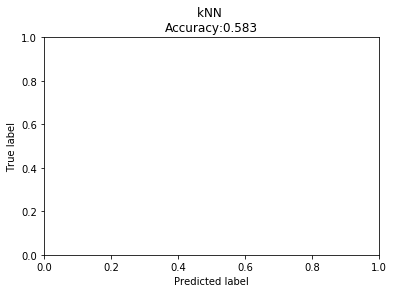

              precision    recall  f1-score   support

           1       0.33      0.50      0.40         2
           2       0.67      0.67      0.67         3
           3       1.00      0.33      0.50         3
           4       0.00      0.00      0.00         0
           5       1.00      1.00      1.00         1
           7       0.00      0.00      0.00         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
          11       0.00      0.00      0.00         0

    accuracy                           0.58        12
   macro avg       0.56      0.50      0.51        12
weighted avg       0.72      0.58      0.61        12

KNN for k =  3
[2 1 4 1 1 5 7 4 9 7 7 8]


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


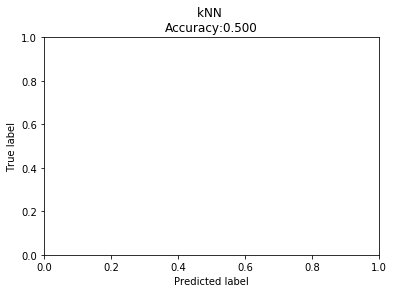

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.33      0.50      0.40         2
           2       1.00      0.33      0.50         3
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         0
           5       1.00      1.00      1.00         1
           7       0.33      1.00      0.50         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1

    accuracy                           0.50        12
   macro avg       0.58      0.60      0.55        12
weighted avg       0.58      0.50      0.48        12

KNN for k =  5
[4 1 4 1 1 5 7 4 9 7 7 8]


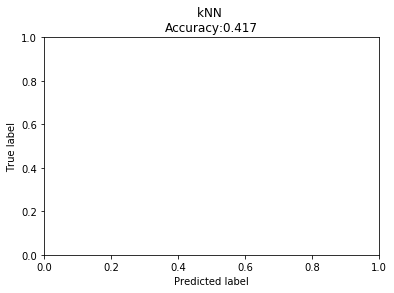

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.33      0.50      0.40         2
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         0
           5       1.00      1.00      1.00         1
           7       0.33      1.00      0.50         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1

    accuracy                           0.42        12
   macro avg       0.46      0.56      0.49        12
weighted avg       0.33      0.42      0.36        12

KNN for k =  7
[4 1 4 1 1 5 1 4 9 7 7 8]


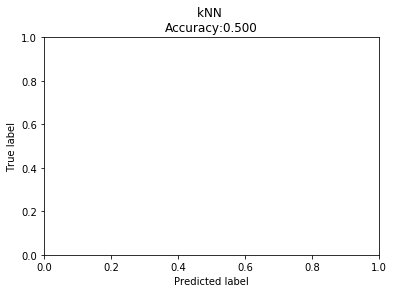

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.50      1.00      0.67         2
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         0
           5       1.00      1.00      1.00         1
           7       0.50      1.00      0.67         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1

    accuracy                           0.50        12
   macro avg       0.50      0.62      0.54        12
weighted avg       0.38      0.50      0.42        12

KNN for k =  9
[4 1 4 2 1 5 1 4 9 8 7 8]


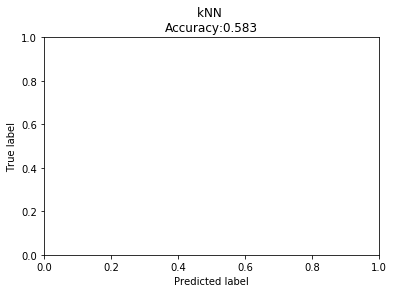

              precision    recall  f1-score   support

           1       0.67      1.00      0.80         2
           2       1.00      0.33      0.50         3
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         0
           5       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       0.50      1.00      0.67         1
           9       1.00      1.00      1.00         1

    accuracy                           0.58        12
   macro avg       0.65      0.67      0.62        12
weighted avg       0.65      0.58      0.56        12



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
for k in n_neighbors:
    best_KNC = KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=k, p=2,
                     weights='distance')
    
    best_KNC = best_KNC.fit(X_train, y_train)
    phase_predictor = best_KNC.predict(X_test)
    print("KNN for k = ", k)
    print(phase_predictor)

    cm = confusion_matrix(y_test, phase_predictor)
    plt.title('kNN \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, phase_predictor)))
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

    print(classification_report(y_test, phase_predictor))

In [36]:
model = KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='distance')

In [37]:
# save the model to disk
filename = '../models/KNC_model_60.sav'
pickle.dump(model, open(filename, 'wb'))

# some time later...

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

[ 2  1 11  2  1  5  2  4  9  3  1  8]


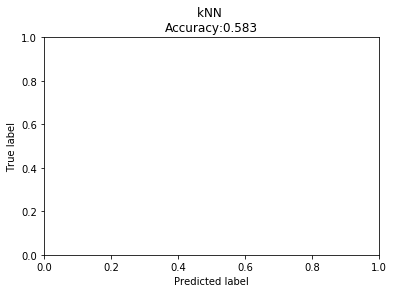

              precision    recall  f1-score   support

           1       0.33      0.50      0.40         2
           2       0.67      0.67      0.67         3
           3       1.00      0.33      0.50         3
           4       0.00      0.00      0.00         0
           5       1.00      1.00      1.00         1
           7       0.00      0.00      0.00         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
          11       0.00      0.00      0.00         0

    accuracy                           0.58        12
   macro avg       0.56      0.50      0.51        12
weighted avg       0.72      0.58      0.61        12



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
best_KNC_2 = loaded_model.fit(X_train, y_train)
phase_predictor_2 = best_KNC_2.predict(X_test)
print(phase_predictor_2)

cm = confusion_matrix(y_test, phase_predictor_2)
plt.title('kNN \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, phase_predictor_2)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

print(classification_report(y_test, phase_predictor_2))

In [39]:
print(classification_report(y_test, phase_predictor))

              precision    recall  f1-score   support

           1       0.67      1.00      0.80         2
           2       1.00      0.33      0.50         3
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         0
           5       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       0.50      1.00      0.67         1
           9       1.00      1.00      1.00         1

    accuracy                           0.58        12
   macro avg       0.65      0.67      0.62        12
weighted avg       0.65      0.58      0.56        12



In [40]:
y_test.head()

13    2
2     1
25    3
16    2
19    2
Name: Cycle, dtype: int64

In [41]:
phase_predictor

array([4, 1, 4, 2, 1, 5, 1, 4, 9, 8, 7, 8])

In [42]:
y_test['phase_prediction'] = phase_predictor

In [43]:
result = X_test

In [44]:
result

,meanVel,maxVel,minVel,stdVel,maxAccel,maxDecel,stdAccel,stdDecel,meanAccel,meanDecel,rAccel,rDecel,rStop,stopCnt,meanStopDur,meanGear,gearChg,Cycle_category,meanVel_category,maxVel_category,minVel_category,stdVel_category,maxAccel_category,maxDecel_category,stdAccel_category,stdDecel_category,meanAccel_category,meanDecel_category,rAccel_category,rDecel_category,rStop_category,stopCnt_category,meanStopDur_category,meanGear_category,gearChg_category
13,8.712881,15.694444,3.333333,3.864531,1.055556,-1.138889,0.255739,0.277385,0.487037,-0.493750,0.535714,0.357143,0.000000,0,0.000000,2.017699,8,0,1,2,1,1,1,3,1,1,1,3,4,3,0,0,0,1,2
2,5.587216,11.801856,0.000000,3.546036,2.682240,-1.654048,0.705970,0.411211,0.800311,-0.578358,0.362832,0.424779,0.035398,2,2.000000,1.552632,11,0,1,1,0,1,4,2,5,2,2,3,2,3,0,1,0,1,2
25,11.443592,19.027778,0.000000,4.946152,1.916667,-1.805556,0.352243,0.439203,0.427083,-0.487599,0.444444,0.345679,0.030864,1,5.000000,2.484663,6,1,1,2,0,1,3,2,1,3,1,3,3,3,0,0,0,2,1
16,5.222960,10.388889,0.000000,2.416394,1.194444,-1.000000,0.362662,0.208717,0.488889,-0.383220,0.267857,0.437500,0.053571,1,6.000000,1.513274,5,0,0,1,0,1,2,3,1,1,1,4,2,3,0,0,0,1,1
19,1.780482,6.805556,0.000000,2.344711,1.611111,-1.472222,0.497838,0.431407,0.729532,-0.533120,0.169643,0.232143,0.544643,2,30.500000,1.106195,4,0,0,0,0,1,3,2,3,3,2,3,1,2,3,1,2,1,1
41,27.232057,35.694444,10.194444,6.529764,1.194444,-1.194444,0.282203,0.260928,0.449856,-0.343305,0.481250,0.243750,0.000000,0,0.000000,4.571429,4,1,3,3,3,2,2,2,1,1,1,4,3,2,0,0,0,5,1
5,2.736355,10.013696,0.000000,3.371479,2.235200,-1.385824,0.634164,0.368077,0.758249,-0.584877,0.230088,0.318584,0.424779,3,16.000000,1.210526,4,0,0,1,0,1,4,2,4,2,2,3,1,2,2,1,1,1,1
24,15.703306,20.194444,7.472222,3.322129,1.166667,-1.916667,0.306926,0.457170,0.356884,-0.436012,0.283951,0.345679,0.000000,0,0.000000,2.920245,7,1,1,2,2,1,2,2,1,3,1,4,2,3,0,0,0,3,1
82,9.547516,19.791667,0.000000,6.814673,2.877778,-2.602778,0.662627,0.634328,0.821648,-0.980620,0.345238,0.511905,0.119048,2,5.000000,2.082353,9,3,1,2,0,2,5,1,4,4,2,2,2,4,1,1,0,2,2
20,8.991309,19.750000,0.000000,5.925984,2.361111,-4.083333,0.533132,0.722176,0.710714,-0.799180,0.432099,0.376543,0.141975,3,7.666667,2.134969,18,1,1,2,0,2,4,0,3,4,2,2,3,3,1,1,0,2,3


In [45]:
result['actual_phase'] = y_test

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [46]:
result['predictive_phase'] = phase_predictor

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [47]:
result

,meanVel,maxVel,minVel,stdVel,maxAccel,maxDecel,stdAccel,stdDecel,meanAccel,meanDecel,rAccel,rDecel,rStop,stopCnt,meanStopDur,meanGear,gearChg,Cycle_category,meanVel_category,maxVel_category,minVel_category,stdVel_category,maxAccel_category,maxDecel_category,stdAccel_category,stdDecel_category,meanAccel_category,meanDecel_category,rAccel_category,rDecel_category,rStop_category,stopCnt_category,meanStopDur_category,meanGear_category,gearChg_category,actual_phase,predictive_phase
13,8.712881,15.694444,3.333333,3.864531,1.055556,-1.138889,0.255739,0.277385,0.487037,-0.493750,0.535714,0.357143,0.000000,0,0.000000,2.017699,8,0,1,2,1,1,1,3,1,1,1,3,4,3,0,0,0,1,2,2,4
2,5.587216,11.801856,0.000000,3.546036,2.682240,-1.654048,0.705970,0.411211,0.800311,-0.578358,0.362832,0.424779,0.035398,2,2.000000,1.552632,11,0,1,1,0,1,4,2,5,2,2,3,2,3,0,1,0,1,2,1,1
25,11.443592,19.027778,0.000000,4.946152,1.916667,-1.805556,0.352243,0.439203,0.427083,-0.487599,0.444444,0.345679,0.030864,1,5.000000,2.484663,6,1,1,2,0,1,3,2,1,3,1,3,3,3,0,0,0,2,1,3,4
16,5.222960,10.388889,0.000000,2.416394,1.194444,-1.000000,0.362662,0.208717,0.488889,-0.383220,0.267857,0.437500,0.053571,1,6.000000,1.513274,5,0,0,1,0,1,2,3,1,1,1,4,2,3,0,0,0,1,1,2,2
19,1.780482,6.805556,0.000000,2.344711,1.611111,-1.472222,0.497838,0.431407,0.729532,-0.533120,0.169643,0.232143,0.544643,2,30.500000,1.106195,4,0,0,0,0,1,3,2,3,3,2,3,1,2,3,1,2,1,1,2,1
41,27.232057,35.694444,10.194444,6.529764,1.194444,-1.194444,0.282203,0.260928,0.449856,-0.343305,0.481250,0.243750,0.000000,0,0.000000,4.571429,4,1,3,3,3,2,2,2,1,1,1,4,3,2,0,0,0,5,1,5,5
5,2.736355,10.013696,0.000000,3.371479,2.235200,-1.385824,0.634164,0.368077,0.758249,-0.584877,0.230088,0.318584,0.424779,3,16.000000,1.210526,4,0,0,1,0,1,4,2,4,2,2,3,1,2,2,1,1,1,1,1,1
24,15.703306,20.194444,7.472222,3.322129,1.166667,-1.916667,0.306926,0.457170,0.356884,-0.436012,0.283951,0.345679,0.000000,0,0.000000,2.920245,7,1,1,2,2,1,2,2,1,3,1,4,2,3,0,0,0,3,1,3,4
82,9.547516,19.791667,0.000000,6.814673,2.877778,-2.602778,0.662627,0.634328,0.821648,-0.980620,0.345238,0.511905,0.119048,2,5.000000,2.082353,9,3,1,2,0,2,5,1,4,4,2,2,2,4,1,1,0,2,2,9,9
20,8.991309,19.750000,0.000000,5.925984,2.361111,-4.083333,0.533132,0.722176,0.710714,-0.799180,0.432099,0.376543,0.141975,3,7.666667,2.134969,18,1,1,2,0,2,4,0,3,4,2,2,3,3,1,1,0,2,3,3,8


In [48]:
result.shape[0], result[result.actual_phase != result.predictive_phase].shape[0]

(12, 5)

In [49]:
100 - (100 * result[result.actual_phase != result.predictive_phase].shape[0] / result.shape[0])

58.333333333333336

In [50]:
#Export dataframe as a csv
result.to_csv("../data/classification_result_with_60_overlaps.csv", index=0)